## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

## Data Pre-processing

In [2]:
data = pd.read_csv('creditCardDataset.csv')

In [3]:
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [4]:
df = data[data['Class'] == 1]

In [5]:
df1 = data[data['Class']== 0]

In [6]:
df1.drop(df1.index[1800: ],0,inplace=True)

In [7]:
data = pd.concat([df, df1], axis=0)

In [8]:
data = data.sample(frac=1).reset_index(drop=True)

In [9]:
data.to_csv('creditCardDataset.csv', index=False)

In [10]:
data

Time        V1        V2        V3        V4        V5        V6  \
0        513.0  0.166862  1.667709 -2.095559  1.835206  0.876545 -1.481721   
1        532.0 -0.681072  0.926831  1.871161  0.923397 -0.438215  0.110163   
2        446.0 -1.146103  1.350274  0.907209 -0.040682 -0.242920 -1.099859   
3        417.0 -0.473731  0.697340  2.279600  1.359875  0.342429  1.392886   
4        574.0 -1.062129 -0.618574  0.615388 -3.335834  0.746649 -0.540531   
...        ...       ...       ...       ...       ...       ...       ...   
2287   84204.0 -0.937843  3.462889 -6.445104  4.932199 -2.233983 -2.291561   
2288     194.0 -1.131517  1.016399  0.735810  1.166614  0.790236 -1.187196   
2289    1260.0  1.259418  0.209318  0.501896  0.626950 -0.531268 -1.007039   
2290     273.0  0.216727  0.710626  1.224876  1.139405 -0.376351 -0.253986   
2291  160034.0 -2.349340  1.512604 -2.647497  1.753792  0.406328 -2.188494   

            V7        V8        V9  ...       V21       V22       V23  \
0    -0.323575 -2.866382 -0.573338  ... -1.383098  0.207549  0.550348   
1     0.918259 -0.222899 -0.040360  ... -0.119718 -0.131065 -0.112667   
2     0.579042  0.045619  0.460784  ... -0.396947 -0.895759  0.099686   
3     0.289971  0.170677  0.578966  ... -0.462425 -0.486810 -0.235667   
4     0.705932  0.032525  1.334181  ... -0.114269 -0.661122  0.136250   
...        ...       ...       ...  ...       ...       ...       ...   
2287 -5.695594  1.338825 -4.322377  ...  1.066550 -0.521657 -0.319917   
2288  0.736469 -0.327992 -0.555549  ...  0.009613  0.315739  0.054210   
2289  0.024348 -0.174048  0.129460  ... -0.263660 -0.789994  0.143175   
2290 -0.034557 -0.812548 -0.260261  ...  0.773476 -0.233609 -0.045366   
2291 -0.686935 -0.547984 -0.099528  ... -0.088519 -0.595178  0.258148   

           V24       V25       V26       V27       V28  Amount  Class  
0    -0.006635 -0.554034 -0.421468  0.007827 -0.039904    1.00      0  
1     0.518059 -0.330417 -0.581855 -0.363707 -0.111442   75.17      0  
2     0.275643 -0.045217  0.095849  0.563119  0.307945   17.99      0  
3    -0.726568  0.085981 -0.351095  0.289067 -0.043030    8.61      0  
4    -1.377245  0.263820 -1.115516  0.079213  0.116638  131.37      0  
...        ...       ...       ...       ...       ...     ...    ...  
2287 -0.405859  0.906802  1.165784  1.374495  0.729889    0.00      1  
2288  0.294232  0.003877 -0.314159 -0.099512  0.122697    1.00      0  
2289  0.365013  0.198321  0.096369 -0.032740  0.017866    1.98      0  
2290  0.368535  0.675418 -0.286281  0.196730  0.226031   18.00      0  
2291  0.061901 -0.354180 -1.152671 -0.736073  0.733703    4.90      1  

[2292 rows x 31 columns]

## Data Visualization

## Histogram

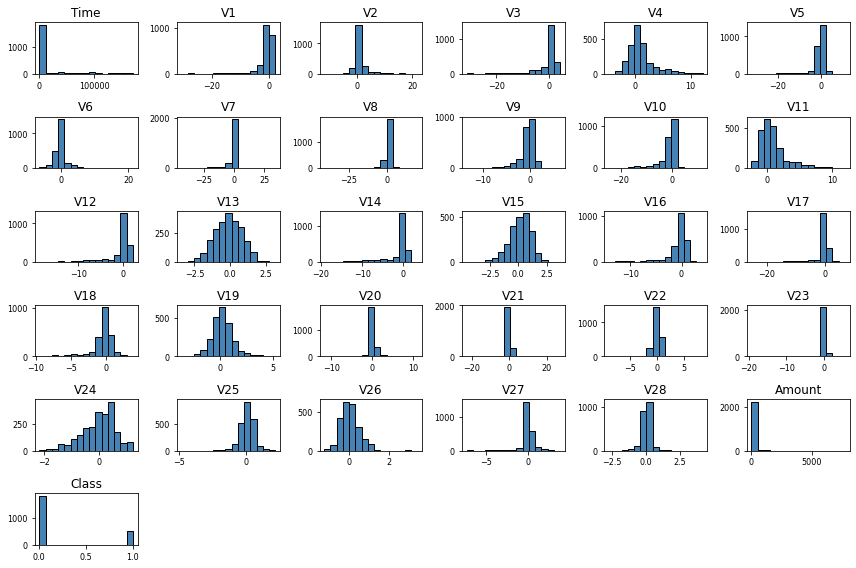

In [11]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.0,2.0))   

## Correlation Matrix

In [12]:
data.style.background_gradient(cmap='Blues')

## Dimensionality reduction

In [13]:
data.drop(['Time','Amount','V28','V26','V21','V19','V15','V13','V11','V6','V4','V2'], axis=1, inplace=True)

## Separating the data into featured and dependent variable

In [14]:
x=data.iloc[: , :-1].values
y=data.iloc[: , -1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.4, random_state=0)

## Standard Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Decision Tree

In [16]:
from sklearn import tree
start = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
end = time.time()

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [18]:
print("Accuracy is:")
print(accuracy*100)
print("Confusion Matrix is:")
print(cm)
print("Execution time is:")
print(end-start)

Accuracy is:
95.092693565976
Confusion Matrix is:
[[683  26]
 [ 19 189]]
Execution time is:
0.030966997146606445


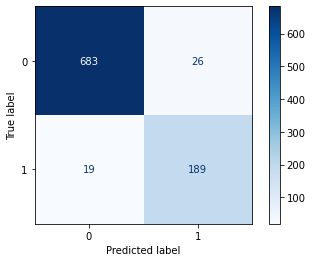

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## Logistic Regression

In [20]:
from sklearn import linear_model
start = time.time()
clf1=linear_model.LogisticRegression()
clf1= clf1.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)
end = time.time()

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy1=accuracy_score(y_test,y_pred1)
cm1=confusion_matrix(y_test,y_pred1)

In [22]:
print("Accuracy is:")
print(accuracy1*100)
print("Confusion Matrix is:")
print(cm1)
print("Execution time is:")
print(end-start)

Accuracy is:
96.94656488549617
Confusion Matrix is:
[[701   8]
 [ 20 188]]
Execution time is:
0.025930404663085938


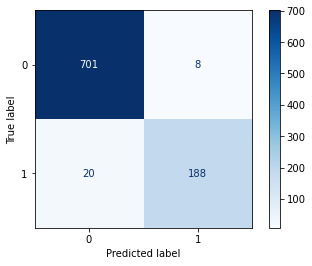

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf1, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
clf2=RandomForestClassifier()
clf2= clf2.fit(x_train,y_train)
y_pred2=clf2.predict(x_test)
end = time.time()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy2=accuracy_score(y_test,y_pred2)
cm2=confusion_matrix(y_test,y_pred2)

In [26]:
print("Accuracy is:")
print(accuracy2*100)
print("Confusion Matrix is:")
print(cm2)
print("Execution time is:")
print(end-start)

Accuracy is:
97.81897491821155
Confusion Matrix is:
[[706   3]
 [ 17 191]]
Execution time is:
0.9231991767883301


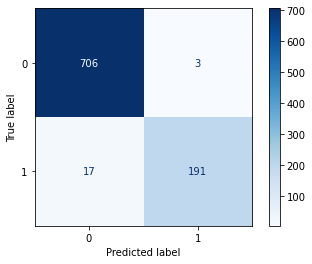

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## Multi Layer Perceptron(ANN)

In [28]:
from sklearn.neural_network import MLPClassifier
start = time.time()
clf3=MLPClassifier(activation= 'relu', learning_rate='adaptive', solver= 'adam')
clf3= clf3.fit(x_train,y_train)
y_pred3=clf3.predict(x_test)
end = time.time()

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy3=accuracy_score(y_test,y_pred3)
cm3=confusion_matrix(y_test,y_pred3)

In [30]:
print("Accuracy is:")
print(accuracy3*100)
print("Confusion Matrix is:")
print(cm3)
print("Execution time is:")
print(end-start)

Accuracy is:
97.38276990185388
Confusion Matrix is:
[[701   8]
 [ 16 192]]
Execution time is:
2.478533983230591


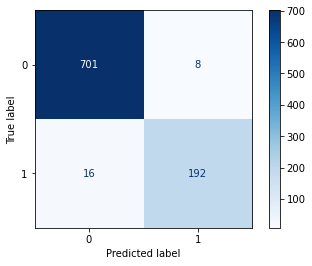

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf3, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
start=time.time()
clf4=KNeighborsClassifier()
clf4= clf4.fit(x_train,y_train)
y_pred4=clf4.predict(x_test)
end=time.time()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy4=accuracy_score(y_test,y_pred4)
cm4=confusion_matrix(y_test,y_pred4)

In [34]:
print("Accuracy is:")
print(accuracy4*100)
print("Confusion Matrix is:")
print(cm4)
print("Execution time is:")
print(end-start)

Accuracy is:
96.83751363140675
Confusion Matrix is:
[[706   3]
 [ 26 182]]
Execution time is:
0.07800149917602539


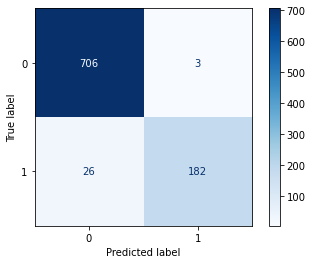

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf4, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## SupportVectorClassifier

In [36]:
from sklearn.svm import SVC
start=time.time()
clf5=SVC()
clf5= clf5.fit(x_train,y_train)
y_pred5=clf5.predict(x_test)
end=time.time()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy5=accuracy_score(y_test,y_pred5)
cm5=confusion_matrix(y_test,y_pred5)

In [38]:
print("Accuracy is:")
print(accuracy5*100)
print("Confusion Matrix is:")
print(cm5)
print("Execution time is:")
print(end-start)

Accuracy is:
96.72846237731734
Confusion Matrix is:
[[704   5]
 [ 25 183]]
Execution time is:
0.08185434341430664


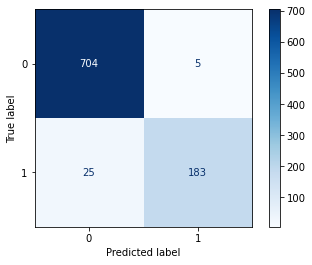

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf5, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## VotingClassifier

In [40]:
from sklearn.ensemble import VotingClassifier
cle=VotingClassifier(estimators=[('rf', clf2),('mlp', clf3)], voting='hard')
cle= cle.fit(x_train,y_train)
y_pred6=cle.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy6=accuracy_score(y_test,y_pred6)
cm6=confusion_matrix(y_test,y_pred6)

In [42]:
print("Accuracy is:")
print(accuracy6*100)
print("Confusion Matrix is:")
print(cm6)

Accuracy is:
97.4918211559433
Confusion Matrix is:
[[706   3]
 [ 20 188]]


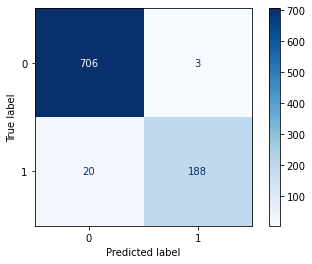

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cle, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [44]:
from sklearn.ensemble import VotingClassifier
cles=VotingClassifier(estimators=[('rf', clf2),('mlp', clf3)], voting='soft')
cles= cles.fit(x_train,y_train)
y_pred7=cles.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy7=accuracy_score(y_test,y_pred7)
cm7=confusion_matrix(y_test,y_pred7)

In [46]:
print("Accuracy is:")
print(accuracy7*100)
print("Confusion Matrix is:")
print(cm7)

Accuracy is:
97.60087241003271
Confusion Matrix is:
[[704   5]
 [ 17 191]]


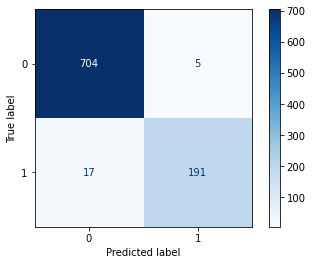

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cles, x_test, y_test,cmap=plt.cm.Blues)
plt.show()

## GridSearch

In [48]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=clf,
             param_grid={'criterion':['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]},
             scoring='accuracy',
             cv=10,
             n_jobs=-1)
grid_search.fit(x_train,y_train)
best_accuracy= grid_search.best_score_
best_parameters=grid_search.best_params_
print(best_accuracy*100)
print(best_parameters)

96.50904474769915
{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}


Accuracy is:
95.41984732824427
Confusion Matrix is:
[[697  12]
 [ 30 178]]


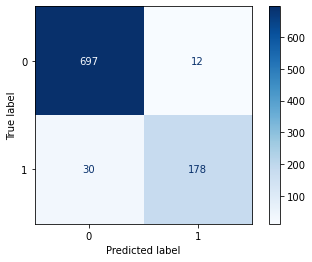

In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, splitter = 'random')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("Accuracy is:")
print(accuracy*100)
print("Confusion Matrix is:")
print(cm)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test,cmap=plt.cm.Blues)
plt.show()